# L0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math, random, pylab
pylab.rcParams['figure.figsize'] = (15.0, 7.0)

SEED = 42
np.random.seed(seed=SEED)

# Perceptron

Perceptron é um classificador binário linear e representa um neurônio, a estrutura básica de uma rede neural. No perceptron, recebe-se os atributos de entrada da base de treinamento (e.g. as entradas de uma porta lógica AND/OR) e multiplica, cada uma delas, por um peso W, conforme Figura 1. Feito isso, os valores resultantes são somados e passam por uma função de ativação.
Nesse notebook, todos os passos para implementação do perceptron serão feitos utilizando Numpy, para isso, 5 etapas deverão ser feitas:
1. Inicializaçao dos pesos e bias
2. Implementando funções de ativação
3. Calculando a saída do neurônio
4. Predição
5. Treino e avaliação

![](../imgs/perceptron.jpg "Title")

### Parte 1 - Inicialização dos pesos e bias

Ao implementar um perceptron, o primeiro passo é iniciar os pesos em um intervalo pequeno, como [-0.5,0.5] aleatoriamente. O bias quando necessário também deve ser inicializado nessa etapa.

Para implementar essa etapa, voçê deve utilizar a função weight_init(num_inputs). Dica: você pode utilizar a [função random do numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html)

In [2]:
def weight_init(num_inputs): 
    """
    Função que inicializa os pesos e bias aleatoriamente utilizando numpy
    Parâmetro: num_inputs - quantidade de entradas X
    Retorna: w,b - pesos e bias da rede inicializados
    """
    w = np.random.rand(num_inputs) - 0.5
    b =  random.random() - 0.5           # O normal seria iniciar com zero.
    return w,b

# Teste da função weight_init:
print(weight_init(5))

(array([-0.12545988,  0.45071431,  0.23199394,  0.09865848, -0.34398136]), 0.33896327238647705)


### Parte 2 - Implementação das funções de ativação
As funções de ativação definem o intervalo de valores que a saída do neurônio poderá ter. Para redes neurais tradicionais, utiliza-se as funções degrau e sigmoid. Redes neurais profundas podem utilizar as funções ReLU, LeakyReLU e Tangente Hiperbólica para evitar problemas no gradiente.

Nsse Notebook, as quatro funções de ativação devem ser implementadas, para verificar a corretude das mesmas, a função visualizeActivationFunc exibe os gráficos correspondentes, as funçoes, suas respectivas saídas e gráfico deverão ser similares ao exposto abaixo: (Dica: utilize a [função exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) do numpy)
* Degrau: saída 0 se menor que 0 e saída 1 caso contrário
$$ \begin{equation}
  degrau =\begin{cases}
    1, & \text{se $x>0$}.\\
    0, & \text{caso contrário}.
  \end{cases}
\end{equation} $$
![](../imgs/degrau.png "Title")
* Sigmoid: saída entre [0,1]
$$ \begin{equation}
  sigmoid = \frac{1}{1 + e^{-z}}
\end{equation} $$
![](../imgs/sigmoid.png "Title")
* Retificadora (Relu): saída 0 caso entrada seja negativa e maior que 1 caso contrário
$$ \begin{equation}
  rely = max(0,x)
\end{equation} $$
![](../imgs/relu.png "Title")
* Tangente Hiperbólica: saída entre [-1,1]
$$ \begin{equation}
  tanh = \frac{2}{e^{-2*z}} - 1
\end{equation} $$
![](../imgs/tanh.png "Title")



## Aparentemente a função tanh acima está com a formula errada
![](../imgs/funcao-tanh-errada.png "Title")

In [3]:
def activation_func(func_type, z):
    """
    Função que implementa as funções de ativação mais comuns
    Parãmetros: func_type - uma string que contém a função de ativação desejada
                z - vetor com os valores de entrada X multiplicado pelos pesos
    Retorna: saída da função de ativação
    """
    ### Seu código aqui (~2 linhas)
    if func_type == 'sigmoid':
        return 1/(1 + np.exp(-z))
    elif func_type == 'tanh':
        return math.sinh(z)/math.cosh(z)
    elif func_type == 'relu':
        return 0 if (z<0) else z
    elif func_type == 'degrau':
        return 0 if (z < 0) else  1
    

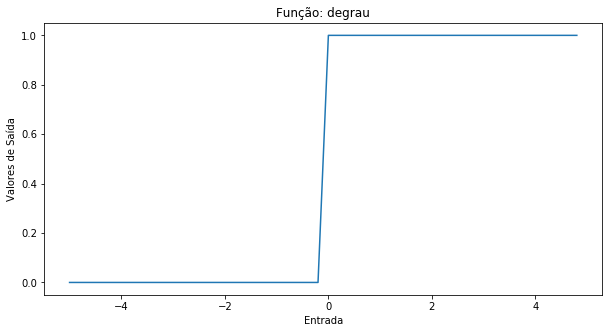

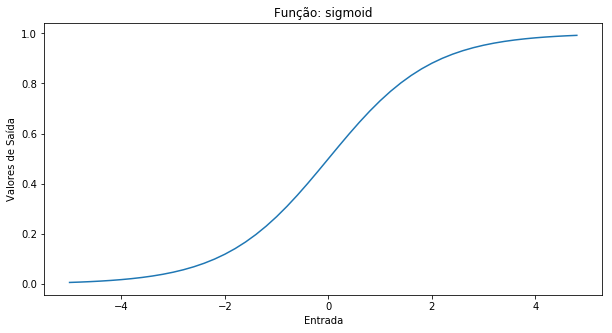

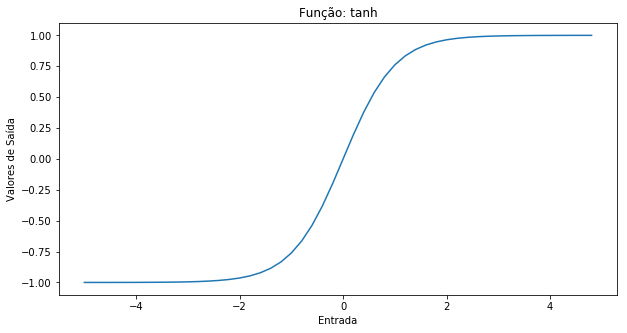

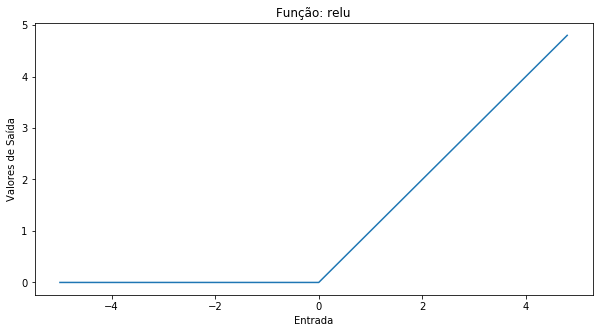

In [4]:
def visualizeActivationFunc(z, func_type):
    z = np.arange(-5., 5., 0.2)
    func = []
    for i in range(len(z)):
        func.append(activation_func(func_type, z[i]))
    
    pylab.rcParams['figure.figsize'] = (10.0, 5.0)
    plt.plot(z,func)
    plt.title("Função: "+func_type)
    plt.xlabel('Entrada')
    plt.ylabel('Valores de Saída')
    plt.show()
# \frac{2}{e\:^{-2z}}-1
#Teste: activation_func
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'degrau')
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'sigmoid')
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'tanh')
visualizeActivationFunc(np.arange(-5., 5., 0.2), 'relu')

### Parte 3 - Cálculo da saída do neurônio¶

Com os pesos, bias inicializados e a função de ativação implementada, calcula-se a saída através da equação:

 $$ \begin{equation}
  Z = W*X + b
\end{equation} $$
Feito isso, a saída final é calculada a partir da função de ativação escolhida. Para implementar essa função, você pode utilizar a [função dot do numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) para multiplicar

In [5]:
def forward(w,b,X):
    """
    Função que implementa a etapa forward propagate do neurônio
    Parâmetros: w - pesos
                b - bias
                X - entradas
    """
    z = np.dot(w,X)+b
    out = activation_func('relu', z)
    return out


# Teste: forward
x = (1, 2, 3)
w,b = weight_init(3)
print("X: ", x)
print("Pesos: ", w)
print("Bias: ", b)
print("Y: ", forward(w,b,x))

X:  (1, 2, 3)
Pesos:  [-0.34400548 -0.44191639  0.36617615]
Bias:  -0.2096454633244027
Y:  0


### Parte 4 - Predição
De posse da saída, deve-se avaliar o sucesso da mesma definindo-se um limiar. Para problemas binários, pode-se estabelecer o limiar em 0.5, de forma que abaixo disso a saída é 0 e 1 caso contrário.

In [6]:
def predict(out):
    """
    Função que aplica um limiar na saída
    Parâmetro: y - saída do neurònio
    """
    ### Seu código aqui (~1 linha)
    return 0 if (out < 0.5) else 1

# Teste: predict
print ("Entrada=0.1 -> Saida=", predict(0.1))
print ("Entrada=0.5 -> Saida=", predict(0.5))
print ("Entrada=1.0 -> Saida=", predict(1.0))

Entrada=0.1 -> Saida= 0
Entrada=0.5 -> Saida= 1
Entrada=1.0 -> Saida= 1


### Parte 5 - Treino e Avaliação

Durante o treinamento, a saída é calculada pela função propagate n vezes, onde n é a quantidade de interações do algoritmo. Na primeira interação, os pesos possuem valores pré-definidos pela função de inicialização e são aleatórios após essa interação, as próximas calculam o peso baseado em um erro, calculado a partir da equação:

 $$ \begin{equation}
  erro = y - ypred
\end{equation} $$

Onde y é a saída original do conjunto de dados e y_pred as saidas calculadas. Dado o erro, os pesos são atualizados a partir da equação:

$$ \begin{equation}
  w += erro*taxa-de-aprendizado*X
\end{equation} $$

 
Onde X é o conjunto de entrada e a taxa de aprendizagem é um parâmetro de otimização que possui seus valorse variando entre [0,1]. Recomenda-se o uso de taxas de aprendizagem medianas para problemas com redes neurais tradicionais simples (como 0.2-0.5) e taxas de aprendizagem menores para redes neurais profundas (acima de 0.02).

In [7]:
def perceptron(x,y, num_interaction, learning_rate):
    """
    Função que implementa o loop do treinamento 
    Parâmetros: x - entrada da rede 
                y - rótulos/labels
                num_interaction - quantidade de interações desejada para a rede convergir
                learning_rate - taxa de aprendizado para cálculo do erro
    """
    training_interation = []
    training_erro = []
    
    #Passo 1 - Inicie os pesos e bias (~1 linha)
    w,b = weight_init(len(x[0]))
    #Passo 2 - Loop por X interações
    for i in range(num_interaction):
        
        # Ajuda no calculo do erro médio quadrado
        erros_interacao = []
        
        for j in range(len(x)):
            
            # Passo 3 -  calcule a saída do neurônio (~1 linha)
            y_calc = predict(forward(w,b,x[j]))
            
            # Passo 4 - calcule o erro entre a saída obtida e a saída desejada nos rótulos/labels (~1 linha)
            erro = y[j] - y_calc  
            
            # Adiciona o erro quadrado dessa instancia
            erros_interacao.append(erro*erro)
            
            # Ajusta os pesos e bias
            w = w + erro*learning_rate*x[j]            
            b = b + erro*learning_rate
        
        # Calcula o erro médio dessa interação
        erro_medio = np.average(erros_interacao)
        
        training_interation.append(i)
        training_erro.append(erro_medio) 
        
        # Apenas para garantir que pare quando o erro atingir um valor limite mínimo
        if (erro_medio < 0.000001):
            print("Finalizado na interação %d visto que o erro médio já se tornou muito pequeno %f" % (i, erro_medio))
            break;
   
    # Cria um grafico com os dados sobre o erro de treinamento
    plt.plot(training_interation, training_erro)
    plt.xlabel('Interação')
    plt.ylabel('Erro médio quadrado')
    plt.show()

    # Preenche o array de saidas preditas
    y_pred = []
    for j in range(len(x)):
        y_pred.append(predict(forward(w,b,x[j])))
       
    # Métricas de Avaliação
    print('Matriz de Confusão:')
    print(confusion_matrix(y, y_pred))
    print('F1 Score:')
    print(classification_report(y, y_pred))
    
    return w, b

## Problema AND

Finalizado na interação 23 visto que o erro médio já se tornou muito pequeno 0.000000


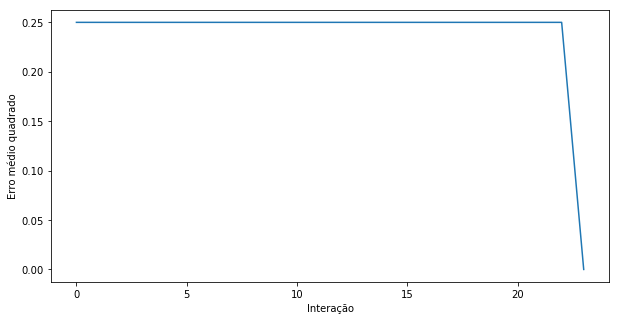

Matriz de Confusão:
[[3 0]
 [0 1]]
F1 Score:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         4

Pesos: [ 0.33111501  0.43807258] 
Bias: -0.24200229925


In [8]:
x_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
w, b = perceptron(x_and,y_and, 2000, 0.01)
print("Pesos:", w, "\nBias:", b)

## Problema OR

Finalizado na interação 42 visto que o erro médio já se tornou muito pequeno 0.000000


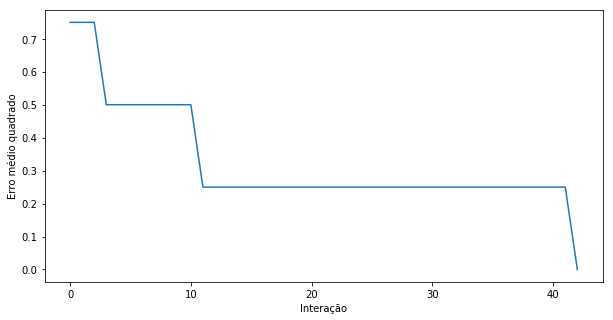

Matriz de Confusão:
[[1 0]
 [0 3]]
F1 Score:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         4

Pesos: [ 0.05058449  0.60990985] 
Bias: 0.465238662599


In [9]:
x_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([0,1,1,1])
w, b = perceptron(x_or, y_or, 2000, 0.01)
print("Pesos:", w, "\nBias:", b)

## Problema linear com vários pontos gerados aleatoriamente

In [10]:
def gerar_pontos( N):
    """
    Função que gera uma dataset com N amostras de forma que o problema se torna linear
    """
    xA,yA,xB,yB = [random.uniform(-1, 1) for i in range(4)]
    V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
    
    X = []
    Y = []
    for i in range(N):
        x1,x2 = [random.uniform(-1, 1) for i in range(2)]
        x = np.array([1,x1,x2])
        s = int(np.sign(V.T.dot(x)))
        X.append(x)
        Y.append(s if s > 0 else 0)
    return X,Y

X,Y = gerar_pontos(1000)

Finalizado na interação 903 visto que o erro médio já se tornou muito pequeno 0.000000


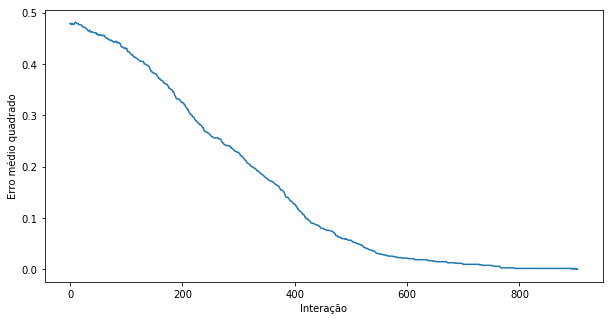

Matriz de Confusão:
[[358   0]
 [  0 642]]
F1 Score:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       358
          1       1.00      1.00      1.00       642

avg / total       1.00      1.00      1.00      1000

Pesos: [ 0.21606264 -0.11510175  0.14329206] 
Bias: 0.3210911035887227


In [11]:
w, b = perceptron(X, Y, 5000, 0.000005)
print("Pesos:", w, "\nBias:", b)